In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

In [2]:
centers = [[1,1,1],[5,5,5],[3,10,10]]


In [3]:
X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

In [4]:
ms = MeanShift()
ms.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [5]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)


[[ 1.35603087  1.16916265  1.14493235]
 [ 4.99466101  4.94839181  5.23600797]
 [ 2.70080982 10.12377827  9.8702186 ]]
Number of estimated clusters: 3


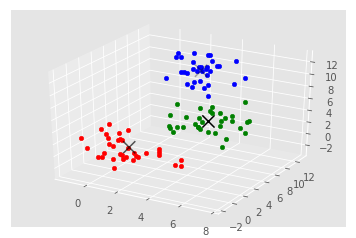

In [6]:
colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

Lets  do this on titanic data set

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

In [9]:
df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

In [10]:
def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

In [11]:
df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)


In [12]:
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [13]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

In [15]:
original_df['cluster_group']=np.nan

In [16]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

/home/dheeraj/work/env1/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

{0: 0.3745019920318725, 1: 1.0, 2: 0.6153846153846154, 3: 0.1}


we got 4 groups, 1st one have 37% survival probability, second one 100%, 3rd one 61% and 4th one 10%

In [18]:
print(original_df[ (original_df['cluster_group']==1) ])


     pclass  survived                                               name  \
35        1         1                           Bowen, Miss. Grace Scott   
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
183       1         1                             Lesurer, Mr. Gustave J   
302       1         1                                   Ward, Miss. Anna   

        sex   age  sibsp  parch    ticket      fare        cabin embarked  \
35   female  45.0      0      0  PC 17608  262.3750          NaN        C   
49     male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
50   female  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
183    male  35.0      0      0  PC 17755  512.3292         B101        C   
302  female  35.0      0      0  PC 17755  512.3292          NaN        C   

    boat  body                                       home.dest  cluster_group  


In [19]:
print(original_df[ (original_df['cluster_group']==0) ].describe())

            pclass     survived         age        sibsp        parch  \
count  1255.000000  1255.000000  994.000000  1255.000000  1255.000000   
mean      2.334661     0.374502   29.440309     0.483665     0.303586   
std       0.817201     0.484187   14.242720     1.047293     0.657028   
min       1.000000     0.000000    0.166700     0.000000     0.000000   
25%       2.000000     0.000000   21.000000     0.000000     0.000000   
50%       3.000000     0.000000   28.000000     0.000000     0.000000   
75%       3.000000     1.000000   38.000000     1.000000     0.000000   
max       3.000000     1.000000   80.000000     8.000000     4.000000   

              fare        body  cluster_group  
count  1254.000000  113.000000         1255.0  
mean     26.382645  159.805310            0.0  
std      31.683900   98.560429            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   69.000000            0.0  
50%      13.500000  165.000000            0.0  
75%   